In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# 改善上課時學的Model 以及不同方法來比較

In [2]:
# Keras Functions
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

# keras utilis Function
from keras.utils import np_utils

# Other
import re
import string
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import tensorflow as tf

from keras.backend import set_session
import os

def create_session(gpu_id='0', pp_mem_frac=None):

    tf.reset_default_graph()
    os.environ["CUDA_VISIBLE_DEVICES"] = gpu_id # can multiple?
    with tf.device('/gpu:' + gpu_id):
        config = tf.ConfigProto()
        config.gpu_options.allow_growth = True
        if pp_mem_frac is not None:
            config.gpu_options.per_process_gpu_memory_fraction=pp_mem_frac
        session = tf.Session(config = config)
    return session
gpu_id = '0'
sess = create_session(gpu_id)
set_session(sess)

Using TensorFlow backend.


### 讀取 MNIST 手寫辨識資料！

In [3]:
# Keras dataset
from keras.datasets import mnist

In [4]:
(x_train, y_train),(x_test,y_test)=mnist.load_data()

In [5]:
print(len(x_train), len(x_test))

60000 10000


In [6]:
print(x_train.shape)
28 *28

(60000, 28, 28)


784

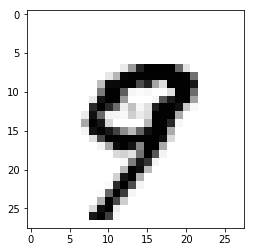

In [7]:
#畫出來資料
X = x_train[87]
plt.imshow(X, cmap= 'Greys')

### 前處理 1 ： 爲了丟進去ANN裏面改資料的格式

In [8]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [9]:
#確認改格式后的樣子
print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


In [10]:
#看看我們資料裏的内容
#x_train[1]
#y_train[2]

### 前處理 2 : 使用one hot incoding

In [11]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [12]:
#看one hot incoding的結果
y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### 準備要使用的Model

In [13]:
from keras.models import Model
from keras.layers import  Input
f1 = Dense(500, activation= 'sigmoid')
f2 = Dense(500, activation= 'sigmoid')
f3 = Dense(10, activation= 'softmax')

In [14]:
print(f1)

In [15]:
x = Input(shape=(784,))
print(x)

Tensor("input_1:0", shape=(?, 784), dtype=float32)


In [16]:
#以前我個人學的方法來，完成神經網路會用到的y值
h1 = f1(x)
h2 = f2(h1)
y = f3(h2)
print(h1)
print(h2)
print(y)

Tensor("dense_1/Sigmoid:0", shape=(?, 500), dtype=float32)
Tensor("dense_2/Sigmoid:0", shape=(?, 500), dtype=float32)
Tensor("dense_3/Softmax:0", shape=(?, 10), dtype=float32)


### 做出4個Model來 以及看看Model的summary

In [17]:
model1 = Model(x, y)
model2 = Model(x, y)
model3 = Model(x, y)
model4 = Model(x, y)
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5010      
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


## 透過不同參數，觀察所得到的結果會如何。

### 第一實驗 【loss = 'mse', optimizer=SGD(lr = 0.1), batch_size=100, epochs=200】

In [18]:
model1.compile(loss = 'mse', optimizer=SGD(lr = 0.1), metrics=['accuracy'])
model1.fit(x_train, y_train, validation_split=0.1, batch_size=100, epochs=200)

Train on 54000 samples, validate on 6000 samples
Epoch 1/200
54000/54000 [==============================] - 2s 33us/step - loss: 0.0837 - acc: 0.3483 - val_loss: 0.0747 - val_acc: 0.5635
Epoch 2/200
54000/54000 [==============================] - 1s 27us/step - loss: 0.0655 - acc: 0.6193 - val_loss: 0.0546 - val_acc: 0.6965
Epoch 3/200
54000/54000 [==============================] - 1s 27us/step - loss: 0.0485 - acc: 0.7304 - val_loss: 0.0392 - val_acc: 0.8020
Epoch 4/200
54000/54000 [==============================] - 1s 27us/step - loss: 0.0366 - acc: 0.8179 - val_loss: 0.0289 - val_acc: 0.8790
Epoch 5/200
54000/54000 [==============================] - 1s 27us/step - loss: 0.0287 - acc: 0.8608 - val_loss: 0.0226 - val_acc: 0.9017
Epoch 6/200
54000/54000 [==============================] - 2s 28us/step - loss: 0.0238 - acc: 0.8785 - val_loss: 0.0188 - val_acc: 0.9070
Epoch 7/200
54000/54000 [==============================] - 1s 25us/step - loss: 0.0207 - acc: 0.8886 - val_loss: 0.0164 - v

54000/54000 [==============================] - 1s 26us/step - loss: 0.0051 - acc: 0.9703 - val_loss: 0.0069 - val_acc: 0.9563
Epoch 59/200
54000/54000 [==============================] - 1s 26us/step - loss: 0.0050 - acc: 0.9705 - val_loss: 0.0069 - val_acc: 0.9563
Epoch 60/200
54000/54000 [==============================] - 1s 26us/step - loss: 0.0050 - acc: 0.9709 - val_loss: 0.0069 - val_acc: 0.9553
Epoch 61/200
54000/54000 [==============================] - 1s 26us/step - loss: 0.0049 - acc: 0.9714 - val_loss: 0.0069 - val_acc: 0.9558
Epoch 62/200
54000/54000 [==============================] - 1s 26us/step - loss: 0.0049 - acc: 0.9714 - val_loss: 0.0068 - val_acc: 0.9570
Epoch 63/200
54000/54000 [==============================] - 1s 26us/step - loss: 0.0048 - acc: 0.9716 - val_loss: 0.0068 - val_acc: 0.9550
Epoch 64/200
54000/54000 [==============================] - 1s 26us/step - loss: 0.0048 - acc: 0.9719 - val_loss: 0.0068 - val_acc: 0.9577
Epoch 65/200
54000/54000 [==============

Epoch 116/200
54000/54000 [==============================] - 1s 25us/step - loss: 0.0033 - acc: 0.9800 - val_loss: 0.0062 - val_acc: 0.9607
Epoch 117/200
54000/54000 [==============================] - 1s 25us/step - loss: 0.0033 - acc: 0.9800 - val_loss: 0.0062 - val_acc: 0.9602
Epoch 118/200
54000/54000 [==============================] - 1s 25us/step - loss: 0.0033 - acc: 0.9801 - val_loss: 0.0061 - val_acc: 0.9608
Epoch 119/200
54000/54000 [==============================] - 1s 25us/step - loss: 0.0033 - acc: 0.9802 - val_loss: 0.0061 - val_acc: 0.9612
Epoch 120/200
54000/54000 [==============================] - 1s 25us/step - loss: 0.0033 - acc: 0.9802 - val_loss: 0.0061 - val_acc: 0.9610
Epoch 121/200
54000/54000 [==============================] - 1s 25us/step - loss: 0.0033 - acc: 0.9804 - val_loss: 0.0061 - val_acc: 0.9612
Epoch 122/200
54000/54000 [==============================] - 1s 25us/step - loss: 0.0032 - acc: 0.9804 - val_loss: 0.0061 - val_acc: 0.9615
Epoch 123/200
54000/

54000/54000 [==============================] - 1s 24us/step - loss: 0.0026 - acc: 0.9849 - val_loss: 0.0058 - val_acc: 0.9625
Epoch 175/200
54000/54000 [==============================] - 1s 25us/step - loss: 0.0026 - acc: 0.9850 - val_loss: 0.0058 - val_acc: 0.9627
Epoch 176/200
54000/54000 [==============================] - 1s 25us/step - loss: 0.0026 - acc: 0.9850 - val_loss: 0.0058 - val_acc: 0.9628
Epoch 177/200
54000/54000 [==============================] - 1s 25us/step - loss: 0.0025 - acc: 0.9851 - val_loss: 0.0058 - val_acc: 0.9627
Epoch 178/200
54000/54000 [==============================] - 1s 25us/step - loss: 0.0025 - acc: 0.9852 - val_loss: 0.0058 - val_acc: 0.9630
Epoch 179/200
54000/54000 [==============================] - 1s 25us/step - loss: 0.0025 - acc: 0.9853 - val_loss: 0.0058 - val_acc: 0.9627
Epoch 180/200
54000/54000 [==============================] - 1s 25us/step - loss: 0.0025 - acc: 0.9853 - val_loss: 0.0058 - val_acc: 0.9632
Epoch 181/200
54000/54000 [=======

In [19]:
score = model1.evaluate(x_test, y_test)
print('loss:', score[0])
print('正確率', score[1])

10000/10000 [==============================] - 0s 28us/step
loss: 0.007442551234003986
正確率 0.9506


### 第二實驗【loss = 'categorical_crossentropy', optimizer=SGD(lr = 0.1), batch_size=100, epochs=200】

In [20]:
model2.compile(loss = 'categorical_crossentropy', optimizer=SGD(lr = 0.1), metrics=['accuracy'])
model2.fit(x_train, y_train, validation_split=0.1, batch_size=100, epochs=200)

Train on 54000 samples, validate on 6000 samples
Epoch 1/200
54000/54000 [==============================] - 2s 30us/step - loss: 0.3745 - acc: 0.8926 - val_loss: 0.2892 - val_acc: 0.9243
Epoch 2/200
54000/54000 [==============================] - 2s 29us/step - loss: 0.3303 - acc: 0.9063 - val_loss: 0.2655 - val_acc: 0.9300
Epoch 3/200
54000/54000 [==============================] - 2s 29us/step - loss: 0.3138 - acc: 0.9075 - val_loss: 0.2798 - val_acc: 0.9218
Epoch 4/200
54000/54000 [==============================] - 2s 29us/step - loss: 0.2985 - acc: 0.9129 - val_loss: 0.2515 - val_acc: 0.9270
Epoch 5/200
54000/54000 [==============================] - 2s 29us/step - loss: 0.2950 - acc: 0.9143 - val_loss: 0.2442 - val_acc: 0.9320
Epoch 6/200
54000/54000 [==============================] - 2s 29us/step - loss: 0.2950 - acc: 0.9116 - val_loss: 0.2574 - val_acc: 0.9208
Epoch 7/200
54000/54000 [==============================] - 2s 29us/step - loss: 0.2935 - acc: 0.9113 - val_loss: 0.2449 - v

54000/54000 [==============================] - 1s 27us/step - loss: 0.1950 - acc: 0.9402 - val_loss: 0.1971 - val_acc: 0.9403
Epoch 60/200
54000/54000 [==============================] - 2s 28us/step - loss: 0.1885 - acc: 0.9413 - val_loss: 0.1570 - val_acc: 0.9540
Epoch 61/200
54000/54000 [==============================] - 2s 28us/step - loss: 0.1774 - acc: 0.9455 - val_loss: 0.1717 - val_acc: 0.9463
Epoch 62/200
54000/54000 [==============================] - 2s 29us/step - loss: 0.1886 - acc: 0.9412 - val_loss: 0.1708 - val_acc: 0.9505
Epoch 63/200
54000/54000 [==============================] - 2s 29us/step - loss: 0.1842 - acc: 0.9419 - val_loss: 0.1643 - val_acc: 0.9563
Epoch 64/200
54000/54000 [==============================] - 1s 27us/step - loss: 0.1894 - acc: 0.9424 - val_loss: 0.1737 - val_acc: 0.9482
Epoch 65/200
54000/54000 [==============================] - 2s 28us/step - loss: 0.1902 - acc: 0.9404 - val_loss: 0.1693 - val_acc: 0.9533
Epoch 66/200
54000/54000 [==============

54000/54000 [==============================] - 1s 27us/step - loss: 0.1577 - acc: 0.9502 - val_loss: 0.1477 - val_acc: 0.9540
Epoch 118/200
54000/54000 [==============================] - 1s 27us/step - loss: 0.1530 - acc: 0.9525 - val_loss: 0.1498 - val_acc: 0.9555
Epoch 119/200
54000/54000 [==============================] - 1s 26us/step - loss: 0.1560 - acc: 0.9509 - val_loss: 0.1565 - val_acc: 0.9533
Epoch 120/200
54000/54000 [==============================] - 1s 26us/step - loss: 0.1540 - acc: 0.9511 - val_loss: 0.1443 - val_acc: 0.9587
Epoch 121/200
54000/54000 [==============================] - 1s 26us/step - loss: 0.1484 - acc: 0.9532 - val_loss: 0.1459 - val_acc: 0.9580
Epoch 122/200
54000/54000 [==============================] - 1s 27us/step - loss: 0.1457 - acc: 0.9538 - val_loss: 0.1311 - val_acc: 0.9628
Epoch 123/200
54000/54000 [==============================] - 1s 26us/step - loss: 0.1434 - acc: 0.9547 - val_loss: 0.1303 - val_acc: 0.9600
Epoch 124/200
54000/54000 [=======

54000/54000 [==============================] - 1s 27us/step - loss: 0.1188 - acc: 0.9624 - val_loss: 0.1249 - val_acc: 0.9610
Epoch 176/200
54000/54000 [==============================] - 1s 27us/step - loss: 0.1149 - acc: 0.9631 - val_loss: 0.1117 - val_acc: 0.9670
Epoch 177/200
54000/54000 [==============================] - 1s 26us/step - loss: 0.1178 - acc: 0.9616 - val_loss: 0.1119 - val_acc: 0.9685
Epoch 178/200
54000/54000 [==============================] - 1s 26us/step - loss: 0.1205 - acc: 0.9618 - val_loss: 0.1133 - val_acc: 0.9667
Epoch 179/200
54000/54000 [==============================] - 1s 26us/step - loss: 0.1200 - acc: 0.9617 - val_loss: 0.1146 - val_acc: 0.9647
Epoch 180/200
54000/54000 [==============================] - ETA: 0s - loss: 0.1149 - acc: 0.963 - 1s 27us/step - loss: 0.1149 - acc: 0.9635 - val_loss: 0.1112 - val_acc: 0.9642
Epoch 181/200
54000/54000 [==============================] - 1s 27us/step - loss: 0.1132 - acc: 0.9650 - val_loss: 0.1093 - val_acc: 0.9

In [21]:
score = model2.evaluate(x_test, y_test)
print('loss:', score[0])
print('正確率', score[1])

10000/10000 [==============================] - 0s 30us/step
loss: 0.14093167258910835
正確率 0.9574


## 使用categorical_crossentropy的第二實驗結果比第一實驗高， 所以用第二的方法用不同參數再實驗 - 改Learning Rate

### 第三實驗 -  提高LR【loss = 'categorical_crossentropy', optimizer=SGD(lr = 0.5), batch_size=100, epochs=200】

In [22]:
model3.compile(loss = 'categorical_crossentropy', optimizer=SGD(lr = 0.5), metrics=['accuracy'])
model3.fit(x_train, y_train, validation_split=0.1, batch_size=100, epochs=200)

Train on 54000 samples, validate on 6000 samples
Epoch 1/200
54000/54000 [==============================] - 2s 33us/step - loss: 0.4399 - acc: 0.8919 - val_loss: 0.2487 - val_acc: 0.9188
Epoch 2/200
54000/54000 [==============================] - 2s 28us/step - loss: 0.2955 - acc: 0.9039 - val_loss: 0.2006 - val_acc: 0.9395
Epoch 3/200
54000/54000 [==============================] - 2s 28us/step - loss: 0.3073 - acc: 0.9020 - val_loss: 0.2143 - val_acc: 0.9373
Epoch 4/200
54000/54000 [==============================] - 2s 28us/step - loss: 0.3435 - acc: 0.8898 - val_loss: 0.3055 - val_acc: 0.9022
Epoch 5/200
54000/54000 [==============================] - 2s 28us/step - loss: 0.3023 - acc: 0.9020 - val_loss: 0.2632 - val_acc: 0.9158
Epoch 6/200
54000/54000 [==============================] - 2s 28us/step - loss: 0.3021 - acc: 0.9043 - val_loss: 0.3550 - val_acc: 0.8810
Epoch 7/200
54000/54000 [==============================] - 1s 27us/step - loss: 0.2952 - acc: 0.9027 - val_loss: 0.2450 - v

54000/54000 [==============================] - 1s 26us/step - loss: 0.2426 - acc: 0.9208 - val_loss: 0.2139 - val_acc: 0.9327
Epoch 60/200
54000/54000 [==============================] - 1s 26us/step - loss: 0.2414 - acc: 0.9215 - val_loss: 0.2165 - val_acc: 0.9385
Epoch 61/200
54000/54000 [==============================] - 1s 27us/step - loss: 0.2362 - acc: 0.9231 - val_loss: 0.2149 - val_acc: 0.9343
Epoch 62/200
54000/54000 [==============================] - 1s 27us/step - loss: 0.2468 - acc: 0.9183 - val_loss: 0.2083 - val_acc: 0.9373
Epoch 63/200
54000/54000 [==============================] - 1s 26us/step - loss: 0.2448 - acc: 0.9210 - val_loss: 0.2075 - val_acc: 0.9373
Epoch 64/200
54000/54000 [==============================] - 1s 26us/step - loss: 0.2368 - acc: 0.9224 - val_loss: 0.2277 - val_acc: 0.9320
Epoch 65/200
54000/54000 [==============================] - 1s 26us/step - loss: 0.2328 - acc: 0.9255 - val_loss: 0.2142 - val_acc: 0.9292
Epoch 66/200
54000/54000 [==============

Epoch 118/200
54000/54000 [==============================] - 1s 27us/step - loss: 0.2064 - acc: 0.9332 - val_loss: 0.2033 - val_acc: 0.9348
Epoch 119/200
54000/54000 [==============================] - 1s 27us/step - loss: 0.2097 - acc: 0.9321 - val_loss: 0.1959 - val_acc: 0.9412
Epoch 120/200
54000/54000 [==============================] - 1s 26us/step - loss: 0.2202 - acc: 0.9279 - val_loss: 0.2111 - val_acc: 0.9358
Epoch 121/200
54000/54000 [==============================] - 1s 26us/step - loss: 0.2228 - acc: 0.9275 - val_loss: 0.1920 - val_acc: 0.9438
Epoch 122/200
54000/54000 [==============================] - 1s 27us/step - loss: 0.2302 - acc: 0.9254 - val_loss: 0.2051 - val_acc: 0.9347
Epoch 123/200
54000/54000 [==============================] - 1s 27us/step - loss: 0.2369 - acc: 0.9226 - val_loss: 0.2186 - val_acc: 0.9327
Epoch 124/200
54000/54000 [==============================] - 1s 26us/step - loss: 0.2329 - acc: 0.9239 - val_loss: 0.2097 - val_acc: 0.9345
Epoch 125/200
54000/

54000/54000 [==============================] - 1s 27us/step - loss: 0.2312 - acc: 0.9236 - val_loss: 0.2136 - val_acc: 0.9290
Epoch 177/200
54000/54000 [==============================] - 1s 28us/step - loss: 0.2448 - acc: 0.9188 - val_loss: 0.2198 - val_acc: 0.9305
Epoch 178/200
54000/54000 [==============================] - 1s 27us/step - loss: 0.2401 - acc: 0.9212 - val_loss: 0.1978 - val_acc: 0.9383
Epoch 179/200
54000/54000 [==============================] - 2s 28us/step - loss: 0.2312 - acc: 0.9258 - val_loss: 0.1909 - val_acc: 0.9445
Epoch 180/200
54000/54000 [==============================] - 1s 28us/step - loss: 0.2309 - acc: 0.9251 - val_loss: 0.1979 - val_acc: 0.9400
Epoch 181/200
54000/54000 [==============================] - 2s 28us/step - loss: 0.2267 - acc: 0.9265 - val_loss: 0.2111 - val_acc: 0.9345
Epoch 182/200
54000/54000 [==============================] - 2s 29us/step - loss: 0.2262 - acc: 0.9257 - val_loss: 0.1982 - val_acc: 0.9385
Epoch 183/200
54000/54000 [=======

In [23]:
score = model3.evaluate(x_test, y_test)
print('loss:', score[0])
print('正確率', score[1])

10000/10000 [==============================] - 0s 30us/step
loss: 0.24921455034315587
正確率 0.921


* 提高LR之後，觀察到 準確率下降， 接下來做相反的實驗

### 第四實驗 -  降低LR【loss = 'mse', optimizer=SGD(lr = 0.5), batch_size=100, epochs=200】

In [24]:
model4.compile(loss = 'categorical_crossentropy', optimizer=SGD(lr = 0.05), metrics=['accuracy'])
model4.fit(x_train, y_train, validation_split=0.1, batch_size=100, epochs=200)

Train on 54000 samples, validate on 6000 samples
Epoch 1/200
54000/54000 [==============================] - 2s 32us/step - loss: 0.2051 - acc: 0.9336 - val_loss: 0.1975 - val_acc: 0.9410
Epoch 2/200
54000/54000 [==============================] - 2s 30us/step - loss: 0.1987 - acc: 0.9352 - val_loss: 0.1980 - val_acc: 0.9390
Epoch 3/200
54000/54000 [==============================] - 2s 30us/step - loss: 0.1969 - acc: 0.9366 - val_loss: 0.1982 - val_acc: 0.9400 loss: 0.1965 - acc: 
Epoch 4/200
54000/54000 [==============================] - 2s 29us/step - loss: 0.1952 - acc: 0.9368 - val_loss: 0.1980 - val_acc: 0.9382
Epoch 5/200
54000/54000 [==============================] - 1s 27us/step - loss: 0.1936 - acc: 0.9371 - val_loss: 0.1951 - val_acc: 0.9410
Epoch 6/200
54000/54000 [==============================] - 1s 27us/step - loss: 0.1925 - acc: 0.9383 - val_loss: 0.1956 - val_acc: 0.9392
Epoch 7/200
54000/54000 [==============================] - 1s 28us/step - loss: 0.1898 - acc: 0.9392 -

Epoch 59/200
54000/54000 [==============================] - 2s 29us/step - loss: 0.1611 - acc: 0.9474 - val_loss: 0.1706 - val_acc: 0.9478
Epoch 60/200
54000/54000 [==============================] - 2s 29us/step - loss: 0.1612 - acc: 0.9465 - val_loss: 0.1704 - val_acc: 0.9485
Epoch 61/200
54000/54000 [==============================] - 2s 29us/step - loss: 0.1606 - acc: 0.9467 - val_loss: 0.1689 - val_acc: 0.9497
Epoch 62/200
54000/54000 [==============================] - 2s 29us/step - loss: 0.1621 - acc: 0.9466 - val_loss: 0.1715 - val_acc: 0.9495
Epoch 63/200
54000/54000 [==============================] - 2s 29us/step - loss: 0.1606 - acc: 0.9471 - val_loss: 0.1720 - val_acc: 0.9497
Epoch 64/200
54000/54000 [==============================] - 2s 29us/step - loss: 0.1602 - acc: 0.9473 - val_loss: 0.1705 - val_acc: 0.9485s: 0.1595 - acc: 0.94
Epoch 65/200
54000/54000 [==============================] - 2s 30us/step - loss: 0.1592 - acc: 0.9473 - val_loss: 0.1694 - val_acc: 0.9492
Epoch 

54000/54000 [==============================] - 1s 28us/step - loss: 0.1447 - acc: 0.9526 - val_loss: 0.1605 - val_acc: 0.9505
Epoch 118/200
54000/54000 [==============================] - 2s 28us/step - loss: 0.1445 - acc: 0.9526 - val_loss: 0.1605 - val_acc: 0.9495
Epoch 119/200
54000/54000 [==============================] - 2s 28us/step - loss: 0.1439 - acc: 0.9533 - val_loss: 0.1627 - val_acc: 0.9497
Epoch 120/200
54000/54000 [==============================] - 2s 28us/step - loss: 0.1437 - acc: 0.9534 - val_loss: 0.1648 - val_acc: 0.9497
Epoch 121/200
54000/54000 [==============================] - 2s 28us/step - loss: 0.1440 - acc: 0.9529 - val_loss: 0.1639 - val_acc: 0.9488
Epoch 122/200
54000/54000 [==============================] - 2s 29us/step - loss: 0.1438 - acc: 0.9529 - val_loss: 0.1649 - val_acc: 0.9490
Epoch 123/200
54000/54000 [==============================] - 2s 29us/step - loss: 0.1430 - acc: 0.9533 - val_loss: 0.1635 - val_acc: 0.9498: 0s - loss: 0.1441 - acc
Epoch 124

Epoch 175/200
54000/54000 [==============================] - 1s 27us/step - loss: 0.1312 - acc: 0.9574 - val_loss: 0.1540 - val_acc: 0.9542
Epoch 176/200
54000/54000 [==============================] - 1s 27us/step - loss: 0.1310 - acc: 0.9574 - val_loss: 0.1547 - val_acc: 0.9528
Epoch 177/200
54000/54000 [==============================] - 1s 27us/step - loss: 0.1310 - acc: 0.9573 - val_loss: 0.1558 - val_acc: 0.9510
Epoch 178/200
54000/54000 [==============================] - 1s 28us/step - loss: 0.1300 - acc: 0.9576 - val_loss: 0.1554 - val_acc: 0.9518
Epoch 179/200
54000/54000 [==============================] - 2s 29us/step - loss: 0.1302 - acc: 0.9580 - val_loss: 0.1563 - val_acc: 0.9518
Epoch 180/200
54000/54000 [==============================] - 2s 29us/step - loss: 0.1301 - acc: 0.9575 - val_loss: 0.1549 - val_acc: 0.9532
Epoch 181/200
54000/54000 [==============================] - 2s 29us/step - loss: 0.1302 - acc: 0.9580 - val_loss: 0.1578 - val_acc: 0.9527
Epoch 182/200
54000/

In [25]:
score = model4.evaluate(x_test, y_test)
print('loss:', score[0])
print('正確率', score[1])

10000/10000 [==============================] - 0s 31us/step
loss: 0.1732858650892973
正確率 0.9465


* LR 0.05跟0.5的結果比不上0.1的結果。 就可以知道說 0.1是對我們的資料最適合的參數。

# 心得  ： 使用適當的Loss Function跟LR，才能得到比較好的準確率。  LR太大，太小都會讓我們有不好的準確率，所以需要試試看不同的實驗才能夠知道哪一個LR是最適合的。

# Future Work : 讓這次的小實驗，分成更細的研究，對ANN的使用更熟悉。 例如 LR分的更細之外， 使用不用的Activation Function來研究(ex : Relu)